# RS Project - Movie Recommendation System

# EDA on `MovieLens1M`

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# Movies dataset

In [2]:
print("Movies DataFrame Head:")
print(movies.head())

print("\nMovies DataFrame Info:")
movies.info()

Movies DataFrame Head:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB



Exploring Genres:
Top 10 Genres:
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
Name: count, dtype: int64


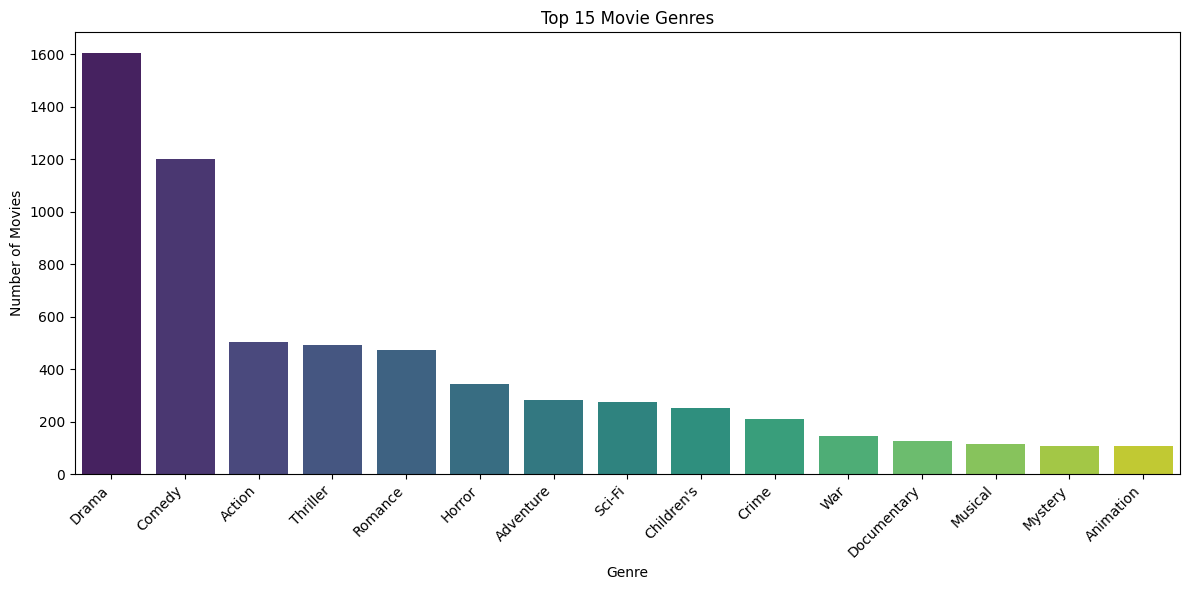

In [3]:
print("\nExploring Genres:")
# Create a list of all genres
all_genres = []
for genres_list in movies['Genres'].str.split('|'):
    if isinstance(genres_list, list): # Ensure it's a list (handles potential NaNs if not dropped)
        all_genres.extend(genres_list)

# Get unique genres and their counts
genres_counts = pd.Series(all_genres).value_counts()
print("Top 10 Genres:")
print(genres_counts.head(10))

# Plotting top N genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.head(15).index, y=genres_counts.head(15).values, palette='viridis')
plt.title('Top 15 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Exploring Movie Release Years:


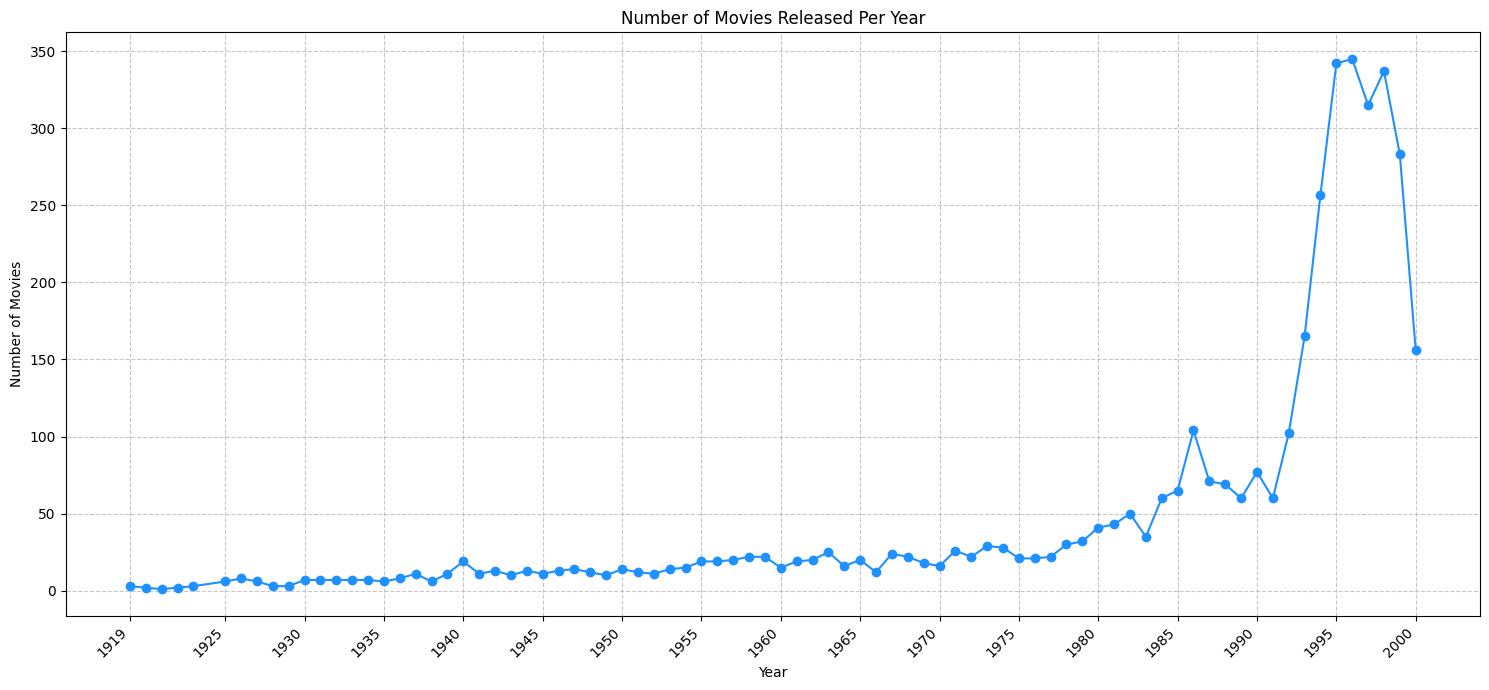


Movies DataFrame with Year column (first 5 rows):
                                Title                        Genres Year_str  \
0                    Toy Story (1995)   Animation|Children's|Comedy     1995   
1                      Jumanji (1995)  Adventure|Children's|Fantasy     1995   
2             Grumpier Old Men (1995)                Comedy|Romance     1995   
3            Waiting to Exhale (1995)                  Comedy|Drama     1995   
4  Father of the Bride Part II (1995)                        Comedy     1995   

   Year  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  


In [4]:
print("\nExploring Movie Release Years:")

movies['Year_str'] = movies['Title'].str.extract(r'\((\d{4})\)$', expand=False)

movies['Year'] = pd.to_numeric(movies['Year_str'], errors='coerce')
movies_with_year = movies.dropna(subset=['Year'])
movies_with_year['Year'] = movies_with_year['Year'].astype(int) 

movies_per_year = movies_with_year['Year'].value_counts().sort_index()


if not movies_per_year.empty:
    plt.figure(figsize=(15, 7))
    movies_per_year.plot(kind='line', color='dodgerblue', marker='o', linestyle='-')
    plt.title('Number of Movies Released Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    
    tick_frequency = 1
    if len(movies_per_year) > 20:
        tick_frequency = max(1, len(movies_per_year) // 15) 
        
    plt.xticks(rotation=45, ha='right', ticks=movies_per_year.index[::tick_frequency])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No valid movie release year data found to plot.")

print("\nMovies DataFrame with Year column (first 5 rows):")
# Displaying the original movies DataFrame, which now includes 'Year_str' and 'Year' (numeric)
print(movies[['Title', 'Genres', 'Year_str', 'Year']].head())

# Ratings dataset

In [86]:
print("\nRatings DataFrame Head:")
print(ratings.head())

print("\nRatings DataFrame Info:")
ratings.info()

print("\nMissing values in Ratings DataFrame:")
print(ratings.isnull().sum())


Ratings DataFrame Head:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB

Missing values in Ratings DataFrame:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


# Distribution of Ratings


Descriptive statistics for Ratings:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Distribution of Ratings:


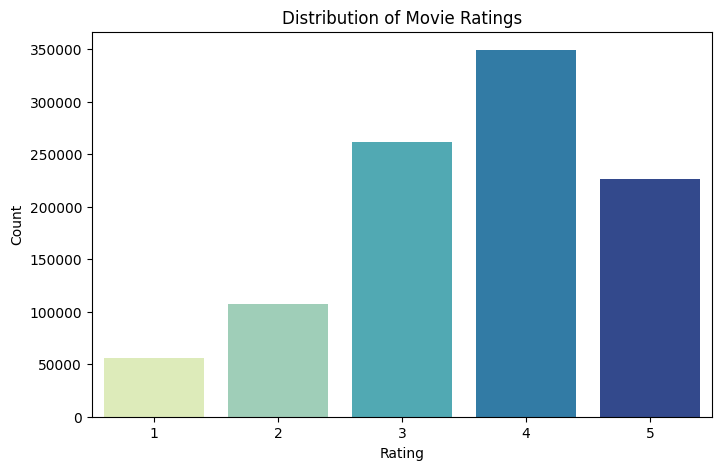

In [87]:
print("\nDescriptive statistics for Ratings:")
print(ratings['Rating'].describe())

print("\nDistribution of Ratings:")
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=ratings, palette='YlGnBu')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Average Rating Per Genre


Merged DataFrame Head:
   UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Year_str  Year  
0                         Drama     1975  1975  
1  Animation|Children's|Musical     1996  1996  
2               Musical|Romance     1964  1964  
3                         Drama     2000  2000  
4   Animation|Children's|Comedy     1998  1998  


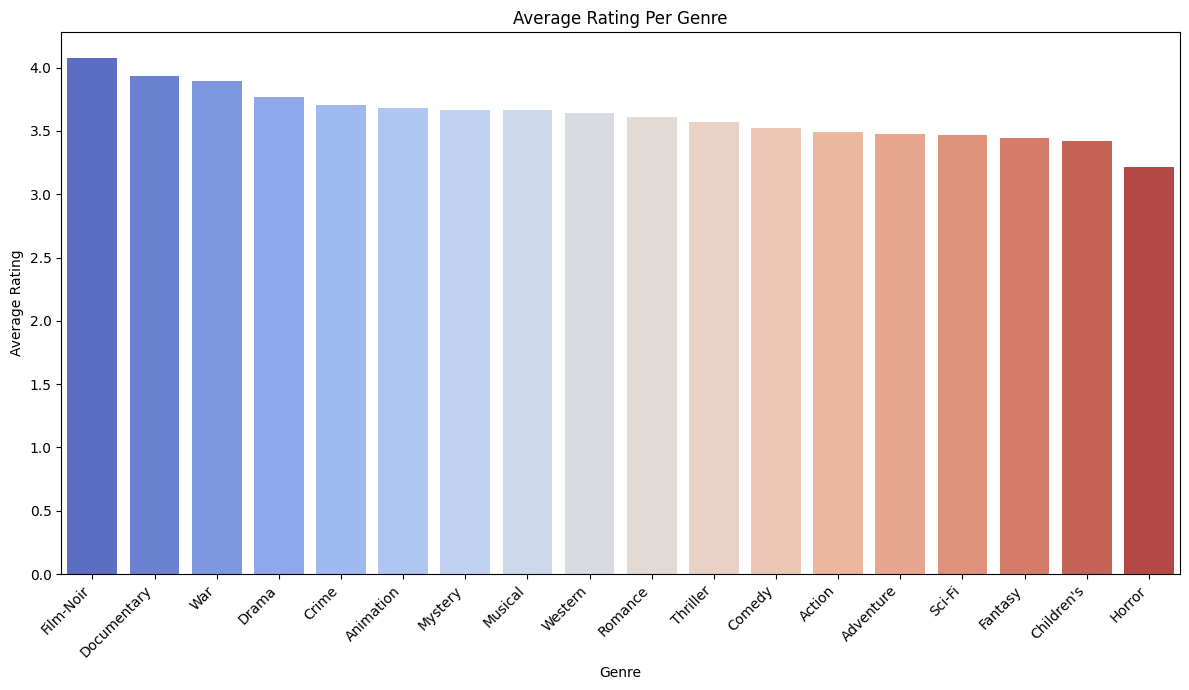

In [91]:
merged_df = pd.merge(ratings, movies, on='MovieID')
print("\nMerged DataFrame Head:")
print(merged_df.head())

genres_exploded = merged_df.assign(Genre=merged_df['Genres'].str.split('|')).explode('Genre')
avg_rating_per_genre = genres_exploded.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values, palette='coolwarm')
plt.title('Average Rating Per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# User & Item based Collaborative Filtering & TruncatedSVD On MovieLens 1M Dataset

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [34]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Item-Based Collaborative Filtering

In [36]:
itemUserMatrix = ratings.pivot(index='MovieID', columns='UserID', values='Rating')
print(f"Item User Matrix:\n{itemUserMatrix}")

Item User Matrix:
UserID   1     2     3     4     5     6     7     8     9     10    ...  \
MovieID                                                              ...   
1         5.0   NaN   NaN   NaN   NaN   4.0   NaN   4.0   5.0   5.0  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3948      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   4.0  ...   
3949      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3950      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3951      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3952      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  .

In [37]:
userMeans = itemUserMatrix.mean(axis=1)
meanCentered = itemUserMatrix.sub(userMeans, axis=0) 
meanCentered = meanCentered.fillna(0)
print(f"Mean Adjusted Item User Matrix:\n{meanCentered}")

Mean Adjusted Item User Matrix:
UserID       1     2     3     4     5         6     7         8         9     \
MovieID                                                                         
1        0.853154   0.0   0.0   0.0   0.0 -0.146846   0.0 -0.146846  0.853154   
2        0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   
3        0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   
4        0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.270588  0.000000   
5        0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   
...           ...   ...   ...   ...   ...       ...   ...       ...       ...   
3948     0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000 -0.635731   
3949     0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   
3950     0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   
3951     0.000000   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000

In [38]:
similarityMatrix = pd.DataFrame(cosine_similarity(meanCentered.values), index=meanCentered.index, columns=meanCentered.index)
print(f"Similarity Matrix:\n {similarityMatrix}")

Similarity Matrix:
 MovieID      1         2         3         4         5         6         7     \
MovieID                                                                         
1        1.000000  0.075213  0.045759  0.072382  0.042931  0.019035  0.043848   
2        0.075213  1.000000  0.035494  0.011151  0.087786  0.026290  0.062671   
3        0.045759  0.035494  1.000000  0.055360  0.131041  0.045253  0.070055   
4        0.072382  0.011151  0.055360  1.000000  0.125895  0.002592  0.016793   
5        0.042931  0.087786  0.131041  0.125895  1.000000  0.017884  0.082446   
...           ...       ...       ...       ...       ...       ...       ...   
3948     0.044028  0.051580  0.058393  0.032913  0.067740  0.022106  0.012014   
3949     0.032424  0.006089  0.000644 -0.052771 -0.016527  0.011033  0.001405   
3950     0.013296 -0.012165  0.026179  0.010593  0.012363 -0.020330  0.015483   
3951     0.011609 -0.006408  0.017762 -0.011509  0.000163 -0.005432  0.029534   
3952    

In [39]:
movieIdToTitle = {}
movieTitleToId = {}

for _, row in movies.iterrows():
    MovieID = row['MovieID']
    Title = row['Title']
    if MovieID in similarityMatrix.index:
        movieIdToTitle[MovieID] = Title
        movieTitleToId[Title] = MovieID

def itemBasedCF(name, topN):
    if name not in movieTitleToId:
        print(f"{name} not found...")
        return
    
    MovieID = movieTitleToId[name]
    simScores = similarityMatrix.loc[MovieID].drop(index=MovieID)
    topIds = simScores.sort_values(ascending=False).head(topN).index
    return [movieIdToTitle[mid] for mid in topIds]

movieName = "Toy Story (1995)"
recommendations = itemBasedCF(movieName, 5)
print(f"Top 5 recommendations for {movieName}:")
for i in recommendations:
    print(i)

Top 5 recommendations for Toy Story (1995):
Toy Story 2 (1999)
Aladdin (1992)
Bug's Life, A (1998)
Beauty and the Beast (1991)
Lion King, The (1994)


# User-Based Collaborative Filtering

In [40]:
userItemMatrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating')
print(f"User Item Matrix:\n{userItemMatrix}")

User Item Matrix:
MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      NaN   NaN   NaN   2.0   NaN   3.0   NaN   NaN   NaN   NaN  ...   
6037      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6038      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6039      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6040      3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  .

In [41]:
userMeans = userItemMatrix.mean(axis=1)
meanCentered = userItemMatrix.sub(userMeans, axis=0)
meanCentered = meanCentered.fillna(0)
print(f"Mean Adjusted User Item Matrix:\n {meanCentered}")

Mean Adjusted User Item Matrix:
 MovieID      1     2     3         4     5         6     7     8     9     \
UserID                                                                      
1        0.811321   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
2        0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
3        0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
4        0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
5        0.000000   0.0   0.0  0.000000   0.0 -1.146465   0.0   0.0   0.0   
...           ...   ...   ...       ...   ...       ...   ...   ...   ...   
6036     0.000000   0.0   0.0 -1.302928   0.0 -0.302928   0.0   0.0   0.0   
6037     0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
6038     0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
6039     0.000000   0.0   0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   
6040    -0.577713   0.0   0.0  0.000000   0

In [42]:
similarityMatrix = pd.DataFrame(cosine_similarity(meanCentered.values), index=meanCentered.index, columns=meanCentered.index)
print(f"User Similarity Matrix:\n{similarityMatrix}")

User Similarity Matrix:
UserID      1         2         3         4         5         6         7     \
UserID                                                                         
1       1.000000  0.032665 -0.032267  0.016359 -0.016774  0.045229  0.014314   
2       0.032665  1.000000  0.023592 -0.016699 -0.032420 -0.019154  0.062835   
3      -0.032267  0.023592  1.000000  0.042521 -0.031153 -0.010965  0.057895   
4       0.016359 -0.016699  0.042521  1.000000 -0.002730  0.032028 -0.031510   
5      -0.016774 -0.032420 -0.031153 -0.002730  1.000000 -0.045909  0.009393   
...          ...       ...       ...       ...       ...       ...       ...   
6036   -0.038463  0.088853  0.028658  0.043721  0.049306 -0.037376  0.045594   
6037    0.000283  0.054506  0.001249  0.014981 -0.023689 -0.025158 -0.024350   
6038    0.000000 -0.013096  0.046408 -0.073011 -0.035286 -0.040051  0.000000   
6039    0.011725  0.032720  0.048975 -0.011580  0.017825 -0.020020 -0.001190   
6040    0.005210

In [43]:
movieIdToTitle = {}
movieTitleToId = {}

for _, row in movies.iterrows():
    MovieID = row['MovieID']
    Title = row['Title']
    movieIdToTitle[MovieID] = Title
    movieTitleToId[Title] = MovieID

def userBasedCF(userId, topN):
    if userId not in similarityMatrix.index:
        print(f"User {userId} not found...")
        return

    simScores = similarityMatrix.loc[userId].drop(index=userId)
    topUsers = simScores.sort_values(ascending=False).head(10).index

    topUserRatings = userItemMatrix.loc[topUsers]
    simVals = simScores.loc[topUsers]

    weightedScores = topUserRatings.T.dot(simVals)
    normScores = weightedScores / simVals.sum()

    alreadyRated = userItemMatrix.loc[userId].dropna().index
    normScores = normScores.drop(index=alreadyRated, errors='ignore')

    topMovieIDs = normScores.sort_values(ascending=False).head(topN).index
    return [movieIdToTitle[mid] for mid in topMovieIDs]

userID = 1
recommendations = userBasedCF(userID, 5)
print(f"Top 5 recommendations for user {userID}:")
for title in recommendations:
    print(title)

Top 5 recommendations for user 1:
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)


#  Checking MAE & RMSE Measures & Calculating Sample Prediction

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

ratings = pd.read_csv("ratings.csv")
trainData, testData = train_test_split(ratings, test_size=0.2, random_state=42)

In [66]:
trainMatrix = trainData.pivot(index='UserID', columns='MovieID', values='Rating')
userMeans = trainMatrix.mean(axis=1)
userCentered = trainMatrix.sub(userMeans, axis=0).fillna(0)

userSimilarity = pd.DataFrame(cosine_similarity(userCentered), index=userCentered.index, columns=userCentered.index)

def predictUserBased(userId, movieId):
    if userId not in userSimilarity.index or movieId not in trainMatrix.columns:
        return np.nan

    sims = userSimilarity[userId]
    ratings = trainMatrix[movieId]
    mask = ratings.notna()

    sims = sims.reindex(ratings.index)
    sims = sims[mask]
    ratings = ratings[mask]

    if sims.sum() == 0:
        return np.nan

    return userMeans[userId] + np.dot(sims, ratings - userMeans[ratings.index]) / sims.sum()

In [67]:
itemMatrix = trainMatrix.T
itemMeans = itemMatrix.mean(axis=1)
itemCentered = itemMatrix.sub(itemMeans, axis=0).fillna(0)

itemSimilarity = pd.DataFrame(cosine_similarity(itemCentered), index=itemCentered.index, columns=itemCentered.index)

def predictItemBased(userId, movieId):
    if movieId not in itemSimilarity.index or userId not in trainMatrix.index:
        return np.nan

    sims = itemSimilarity[movieId]
    ratings = trainMatrix.loc[userId]
    mask = ratings.notna()

    sims = sims.reindex(ratings.index)
    sims = sims[mask]
    ratings = ratings[mask]

    if sims.sum() == 0:
        return np.nan

    return itemMeans[movieId] + np.dot(sims, ratings - itemMeans[ratings.index]) / sims.sum()

In [68]:
def evaluate(modelFunc):
    predictions = []
    actuals = []
    for _, row in testData.iterrows():
        pred = modelFunc(row['UserID'], row['MovieID'])
        if not np.isnan(pred):
            predictions.append(pred)
            actuals.append(row['Rating'])

    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rmse, mae

userRmse, userMae = evaluate(predictUserBased)
itemRmse, itemMae = evaluate(predictItemBased)

In [69]:
user1RatingForItem1193 = predictUserBased(1, 661)
print("Actual rating of user 1 for Movie 1193: 5")
print(f"Predicted rating of user 1 for Movie 1193:{user1RatingForItem1193: .4f}")

user48RatingForItem1 = predictUserBased(53, 25)
print("Actual rating of user 48 for Movie 25: 5")
print(f"Predicted rating of user 48 for Movie 25:{user48RatingForItem1: .4f}")

Actual rating of user 1 for Movie 1193: 5
Predicted rating of user 1 for Movie 1193: 1.7899
Actual rating of user 48 for Movie 25: 5
Predicted rating of user 48 for Movie 25: 4.4416


In [70]:
print(f"User Based Collaborative Filtering - MAE: {userMae:.4f}, RMSE: {userRmse:.4f}")
print(f"Item Based Collaborative Filtering - MAE: {itemMae:.4f}, RMSE: {itemRmse:.4f}")

User Based Collaborative Filtering - MAE: 0.8834, RMSE: 41.3271
Item Based Collaborative Filtering - MAE: 0.7087, RMSE: 2.3991


# Introducing Changes to bring RMSE & MAE down

In [92]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

ratings = pd.read_csv("ratings.csv")

In [93]:
# I will be taking a subset of data to reduce matrix size and sparsity and computation time as the full dataset has approx 6000 users and 4000 movies.
# I'll only take users with more than 20 movies rated and I'll select only those movies that have more than 50 ratings

minUserRatings = 20
minMovieRatings = 50
userCounts = ratings['UserID'].value_counts()
movieCounts = ratings['MovieID'].value_counts()
activeUsers = userCounts[userCounts >= minUserRatings].index[:500]
popularMovies = movieCounts[movieCounts >= minMovieRatings].index[:500]
subsetRatings = ratings[ratings['UserID'].isin(activeUsers) & ratings['MovieID'].isin(popularMovies)]

In [94]:
#Original code evaluated all test ratings approx 200,000 which was computationally expensive and taking so much time
#I'll only sample test set to 10,000 ratings for fast processing

trainData, testData = train_test_split(subset_ratings, test_size=0.2, random_state=42)
if len(testData) > 10000:
    testData = testData.sample(n=10000, random_state=42)

In [95]:
trainMatrix = trainData.pivot(index='UserID', columns='MovieID', values='Rating')
print(trainMatrix)

MovieID  1     2     6     10    11    16    17    21    24    25    ...  \
UserID                                                               ...   
48        4.0   3.0   4.0   4.0   NaN   NaN   NaN   3.0   NaN   NaN  ...   
53        NaN   5.0   NaN   NaN   NaN   5.0   5.0   NaN   NaN   5.0  ...   
62        NaN   NaN   3.0   NaN   NaN   4.0   NaN   4.0   NaN   NaN  ...   
117       3.0   NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
123       3.0   NaN   5.0   NaN   NaN   4.0   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
5964      5.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  ...   
5996      5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6000      3.0   3.0   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6016      4.0   NaN   NaN   NaN   3.0   NaN   4.0   4.0   NaN   3.0  ...   
6036      NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   2.0   4.0  ...   

MovieID  37

In [96]:
#using global mean rating for users or items that will not be in the pivot table
globalMean = trainData['Rating'].mean()
print(globalMean)

3.6882238114829438


In [97]:
userMeans = trainMatrix.mean(axis=1)
userCentered = trainMatrix.sub(userMeans, axis=0).fillna(0)
userSimilarity = pd.DataFrame(cosine_similarity(userCentered), index=userCentered.index, columns=userCentered.index)

def predictUserBased(userId, movieId, k=10):
    if userId not in userSimilarity.index or movieId not in trainMatrix.columns:
        return globalMean

    sims = userSimilarity[userId]
    ratings = trainMatrix[movieId]
    mask = ratings.notna()

    sims = sims.reindex(ratings.index)[mask]
    ratings = ratings[mask]
    
    # rather than using all similarities like negative ones too, I am using top 10 similar users, which will improve accuracy and speed up prediction process
    sims = sims[sims > 0] # filtering for only positive simalirites
    if len(sims) == 0:
        return globalMean
    topK = sims.nlargest(k)
    ratings = ratings.loc[topK.index]
    
    simSum = topK.sum()
    if simSum == 0:
        return globalMean

    weightedSum = np.dot(topK, ratings - userMeans[ratings.index])
    pred = userMeans[userId] + weightedSum / simSum
    
    # without cliping, extreme predictions will be allowed like too high or too low so with clipping, we will control high RMSE & MAE
    return np.clip(pred, 1, 5)

In [98]:
itemMatrix = trainMatrix.T
itemMeans = itemMatrix.mean(axis=1)
itemCentered = itemMatrix.sub(itemMeans, axis=0).fillna(0)
itemSimilarity = pd.DataFrame(cosine_similarity(itemCentered), index=itemCentered.index, columns=itemCentered.index)

def predictItemBased(userId, movieId, k=10):
    if movieId not in itemSimilarity.index or userId not in trainMatrix.index:
        return globalMean

    sims = itemSimilarity[movieId]
    ratings = trainMatrix.loc[userId]
    mask = ratings.notna()

    sims = sims.reindex(ratings.index)[mask]
    ratings = ratings[mask]
    
    sims = sims[sims > 0]
    if len(sims) == 0:
        return globalMean
    topK = sims.nlargest(k)
    ratings = ratings.loc[topK.index]
    
    simSum = topK.sum()
    if simSum == 0:
        return globalMean

    weightedSum = np.dot(topK, ratings - itemMeans[ratings.index])
    pred = itemMeans[movieId] + weightedSum / simSum

    return np.clip(pred, 1, 5)

In [99]:
def evaluate(modelFunc, k=10):
    predictions = []
    actuals = []
    for _, row in testData.iterrows():
        pred = modelFunc(row['UserID'], row['MovieID'], k)
        predictions.append(pred)
        actuals.append(row['Rating'])

    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rmse, mae


userRmse, userMae = evaluate(predictUserBased)
itemRmse, itemMae = evaluate(predictItemBased)

In [100]:
user1RatingForItem1193 = predictUserBased(1, 661)
print("Actual rating of user 1 for Movie 1193: 5")
print(f"Predicted rating of user 1 for Movie 1193:{user1RatingForItem1193: .4f}")

user48RatingForItem1 = predictUserBased(53, 25)
print("Actual rating of user 48 for Movie 25: 5")
print(f"Predicted rating of user 48 for Movie 25:{user48RatingForItem1: .4f}")

Actual rating of user 1 for Movie 1193: 5
Predicted rating of user 1 for Movie 1193: 3.6882
Actual rating of user 48 for Movie 25: 5
Predicted rating of user 48 for Movie 25: 4.8402


In [101]:
print(f"User Based Collaborative Filtering - MAE:{userMae: .4f}, RMSE:{userRmse: .4f}")
print(f"Item Based Collaborative Filtering - MAE:{itemMae: .4f}, RMSE:{itemRmse: .4f}")

User Based Collaborative Filtering - MAE: 0.6832, RMSE: 0.8749
Item Based Collaborative Filtering - MAE: 0.6535, RMSE: 0.8380


# Applying Matrix Factorization Using TruncatedSVD

In [58]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

ratings = pd.read_csv("ratings.csv")
trainData, testData = train_test_split(ratings, test_size=0.2, random_state=42)

userItemMatrix = trainData.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

svd = TruncatedSVD(n_components=20, random_state=42)
userFactors = svd.fit_transform(userItemMatrix)
itemFactors = svd.components_

predictedRatings = np.dot(userFactors, itemFactors)
predictedMatrix = pd.DataFrame(predictedRatings, index=userItemMatrix.index, columns=userItemMatrix.columns)

def getPrediction(userId, movieId):
    try:
        return predictedMatrix.loc[userId, movieId]
    except KeyError:
        return np.nan

predictions = []
actuals = []

for _, row in testData.iterrows():
    pred = getPrediction(row['UserID'], row['MovieID'])
    if not np.isnan(pred):
        predictions.append(pred)
        actuals.append(row['Rating'])

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"TruncatedSVD Matrix Factorization MAE: {mae:.4f}")
print(f"TruncatedSVD Matrix Factorization RMSE: {rmse:.4f}")

TruncatedSVD Matrix Factorization MAE: 2.4385
TruncatedSVD Matrix Factorization RMSE: 2.7063


# Neural Network (Autoencoder) based CBF

In [104]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")


user_item_matrix = ratings.pivot_table(index='UserID', columns='MovieID', values='Rating')

user_means = user_item_matrix.replace(0, np.nan).mean(axis=1)

normalized_matrix = user_item_matrix.sub(user_means, axis=0).fillna(0)

user_tensor = torch.FloatTensor(normalized_matrix.values)

In [105]:
user_id_to_index = {uid: idx for idx, uid in enumerate(user_item_matrix.index)}
index_to_user_id = {idx: uid for uid, idx in user_id_to_index.items()}

movie_id_to_index = {mid: idx for idx, mid in enumerate(user_item_matrix.columns)}
index_to_movie_id = {idx: mid for mid, idx in movie_id_to_index.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
user_tensor = user_tensor.to(device)

In [106]:
class Autoencoder(nn.Module):
    def __init__(self, num_items):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_items, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, num_items)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [107]:
num_items = user_tensor.shape[1]
model = Autoencoder(num_items).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(user_tensor)
    loss = criterion(output, user_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.0456
Epoch 20/100, Loss: 0.0443
Epoch 30/100, Loss: 0.0436
Epoch 40/100, Loss: 0.0427
Epoch 50/100, Loss: 0.0417
Epoch 60/100, Loss: 0.0409
Epoch 70/100, Loss: 0.0401
Epoch 80/100, Loss: 0.0394
Epoch 90/100, Loss: 0.0388
Epoch 100/100, Loss: 0.0382


In [108]:
ratings = ratings[ratings['MovieID'].isin(user_item_matrix.columns)]
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=42)

model.eval()
predictions = []
true_ratings = []

with torch.no_grad():
    recon = model(user_tensor).cpu().numpy()
    recon += user_means.values.reshape(-1, 1)

    for _, row in test_df.iterrows():
        uid, mid, true_r = int(row['UserID']), int(row['MovieID']), row['Rating']
        if uid in user_id_to_index and mid in movie_id_to_index:
            u_idx = user_id_to_index[uid]
            m_idx = movie_id_to_index[mid]
            pred = recon[u_idx][m_idx]
            predictions.append(pred)
            true_ratings.append(true_r)

In [110]:
mse = mean_squared_error(true_ratings, predictions)
mae = mean_absolute_error(true_ratings, predictions)
print(f"Autoencoder - RMSE: {np.sqrt(mse):.4f}, MAE: {mae:.4f}")

Autoencoder - RMSE: 0.8856, MAE: 0.6959


In [111]:
movie_lookup = movies.set_index("MovieID")["Title"].to_dict()

def recommend_movies_autoencoder(user_id, top_n=10):
    if user_id not in user_id_to_index:
        print(f"User ID {user_id} not found.")
        return

    model.eval()
    with torch.no_grad():
        user_idx = user_id_to_index[user_id]
        user_input = user_tensor[user_idx].unsqueeze(0).to(device)
        predicted = model(user_input).cpu().numpy().flatten()
        predicted += user_means[user_id]

    rated_movies = user_item_matrix.loc[user_id].dropna().index
    rated_indices = [movie_id_to_index[mid] for mid in rated_movies if mid in movie_id_to_index]
    for idx in rated_indices:
        predicted[idx] = -np.inf

    top_indices = np.argsort(predicted)[::-1][:top_n]

    print(f"\nTop {top_n} Autoencoder recommendations for User {user_id}:")
    for idx in top_indices:
        movie_id = index_to_movie_id[idx]
        title = movie_lookup.get(movie_id, "Unknown")
        score = predicted[idx]
        print(f"- {title} (Predicted Rating: {float(score):.3f})")

In [113]:
try:
    user_input_id = int(input("Enter User ID for Autoencoder-based recommendations: "))
    recommend_movies_autoencoder(user_input_id, top_n=10)
except:
    print("Invalid input")

Enter User ID for Autoencoder-based recommendations:  1



Top 10 Autoencoder recommendations for User 1:
- Shawshank Redemption, The (1994) (Predicted Rating: 4.295)
- Godfather, The (1972) (Predicted Rating: 4.274)
- Braveheart (1995) (Predicted Rating: 4.273)
- American Beauty (1999) (Predicted Rating: 4.268)
- Dances with Wolves (1990) (Predicted Rating: 4.261)
- Ghost (1990) (Predicted Rating: 4.259)
- Forrest Gump (1994) (Predicted Rating: 4.252)
- Raiders of the Lost Ark (1981) (Predicted Rating: 4.248)
- Sleepless in Seattle (1993) (Predicted Rating: 4.248)
- Hunt for Red October, The (1990) (Predicted Rating: 4.246)
